# Star Wars Survey
## Analysis of the Survey to understand the following 
- What is the most watched Episode of the StarWars
- What are the ratings of all the episodes?
- Re do the above analysis if but for females and males independently


### Analysis Outline
1. Load the libraries that we will use
2. Load the dataset into pandas
3. Display the data to get an overview idea of what the columns and rows we have
    - Using the pd.set_options to force the output to display all the colums
4. Rename the column names to make sense


### STEP 1: Import the libraries

In [26]:
#import the libraries
import pandas as pd # Pandas is a library which is very powerful in data manipulation and analysis
import numpy as np  # NumPy is another library which is very powerful in handling arrays and matrices
import time # to help me evaluating the time it takes to run loops
import matplotlib.pyplot as plt
%matplotlib inline
import math #to do some maths

### STEP 2: Load the data into pandas

In [2]:
#load the data set into pandas
star_wars = pd.read_csv('star_wars.csv')

### STEP 3: Display the overview of the data set to understand the dat

In [3]:
#Display the dataset to get idea of the columns we have
pd.set_option('display.max_columns', None) #let view all the columns
star_wars

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182,3.288389e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of th

### STEP 4: Rename the columns to be more meaningful

In [4]:
#inspect RespondentID 
star_wars.rename(columns={'RespondentID':'ID','Have you seen any of the 6 films in the Star Wars franchise?':'Seen_one','Do you consider yourself to be a fan of the Star Wars film franchise?':'Are you a fan?','Which of the following Star Wars films have you seen? Please select all that apply.':'Star Wars: Episode I The Phantom Menace','Unnamed: 4':'Star Wars: Episode II Attack of the Clones','Unnamed: 5':'Star Wars: Episode III Revenge of the Sith','Unnamed: 6':'Star Wars: Episode IV A New Hope','Unnamed: 7':'Star Wars: Episode V The Empire Strikes Back','Unnamed: 8':'Star Wars: Episode VI Return of the Jedi','Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'RANKING;Star Wars: Episode I The Phantom Menace','Unnamed: 10':'RANKING;Star Wars: Episode II Attack of the Clones','Unnamed: 11':'RANKING;Star Wars: Episode III Revenge of the Sith','Unnamed: 12':'RANKING;Star Wars: Episode IV A New Hope','Unnamed: 13':'RANKING;Star Wars: Episode V The Empire Strikes Back','Unnamed: 14':'RANKING;Star Wars: Episode VI Return of the Jedi','Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her':'FAV;Han Solo','Unnamed: 16':'FAV;Luke Skywalker','Unnamed: 17':'FAV;Princess Leia Organa','Unnamed: 18':'FAV;Anakin Skywalker','Unnamed: 19':'FAV;Obi Wan Kenobi','Unnamed: 20':'FAV;Emperor Palpatine','Unnamed: 21':'FAV;Darth Vader','Unnamed: 22':'FAV;Lando Calrissian','Unnamed: 23':'FAV;Boba Fett','Unnamed: 24':'FAV;C-3P0','Unnamed: 25':'FAV;R2 D2','Unnamed: 26':'FAV;Jar Jar Binks','Unnamed: 27':'FAV;Padme Amidala','Unnamed: 28':'FAV;Yoda'}, inplace = True) 

### STEP 5: Convert column 1 and 2 into True and False

In [5]:
#change the yes and no s to True and False because we have changed the heading
star_wars['Seen_one'] = star_wars['Seen_one'].map({'Yes':True, 'No':False})
star_wars['Are you a fan?'] = star_wars['Are you a fan?'].map({'Yes':True, 'No':False})

### STEP 6: Convert column 7 to column 8 into True and False

In [6]:
#the function that will change the column into true and false
    
def convert_text(dataset,string):
    output = []
    for item in dataset:
        #print(item,'R',string)
        if item == string:
            
            output.append(True)
        else:
            output.append(False)
    return output


In [8]:


star_wars['Star Wars: Episode I The Phantom Menace'] = convert_text(star_wars['Star Wars: Episode I The Phantom Menace'],'Star Wars: Episode I  The Phantom Menace')
star_wars['Star Wars: Episode II Attack of the Clones'] = convert_text(star_wars['Star Wars: Episode II Attack of the Clones'],'Star Wars: Episode II  Attack of the Clones')
star_wars['Star Wars: Episode III Revenge of the Sith'] = convert_text(star_wars['Star Wars: Episode III Revenge of the Sith'],'Star Wars: Episode III  Revenge of the Sith')
star_wars['Star Wars: Episode IV A New Hope'] = convert_text(star_wars['Star Wars: Episode IV A New Hope'],'Star Wars: Episode IV  A New Hope')
star_wars['Star Wars: Episode V The Empire Strikes Back'] = convert_text(star_wars['Star Wars: Episode V The Empire Strikes Back'],'Star Wars: Episode V The Empire Strikes Back')
star_wars['Star Wars: Episode VI Return of the Jedi'] = convert_text(star_wars['Star Wars: Episode VI Return of the Jedi'],'Star Wars: Episode VI Return of the Jedi')



### Delete the first row which is not containing data

In [13]:
star_wars = star_wars.drop([0],axis=0)

In [14]:
star_wars

,ID,Seen_one,Are you a fan?,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,RANKING;Star Wars: Episode I The Phantom Menace,RANKING;Star Wars: Episode II Attack of the Clones,RANKING;Star Wars: Episode III Revenge of the Sith,RANKING;Star Wars: Episode IV A New Hope,RANKING;Star Wars: Episode V The Empire Strikes Back,RANKING;Star Wars: Episode VI Return of the Jedi,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",FAV;Luke Skywalker,FAV;Princess Leia Organa,FAV;Anakin Skywalker,FAV;Obi Wan Kenobi,FAV;Emperor Palpatine,FAV;Darth Vader,FAV;Lando Calrissian,FAV;Boba Fett,FAV;C-3P0,FAV;R2 D2,FAV;Jar Jar Binks,FAV;Padme Amidala,FAV;Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,4,6,2,1,3,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182,3.288389e+09,True,True,True,True,True,True,True,True,5,4,6,3,2,1,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Very favorably,Very favorably,Somewhat favorably,Somewhat favorably,Very favorably,Han,No,NaN,Yes,Female,18-29,"$0 - $24,999",Some college or Associate degree,East North Central
1183,3.288379e+09,True,True,True,True,True,True,True,True,4,5,6,2,3,1,Very favorably,Somewhat favorably,Very favorably,Somewhat unfavorably,Very favorably,Neither favorably nor unfavorably (neutral),Very unfavorably,Somewhat favorably,Unfamiliar (N/A),Somewhat favorably,Very favorably,Somewhat unfavorably,Somewhat unfavorably,Very favorably,I don't understand this question,No,NaN,

In [22]:
#number of views
episode1_watches =star_wars['Star Wars: Episode I The Phantom Menace'][star_wars['Star Wars: Episode I The Phantom Menace'] == True].count()
episode2_watches =star_wars['Star Wars: Episode II Attack of the Clones'][star_wars['Star Wars: Episode II Attack of the Clones'] == True].count()
episode3_watches =star_wars['Star Wars: Episode III Revenge of the Sith'][star_wars['Star Wars: Episode III Revenge of the Sith'] == True].count()
episode4_watches =star_wars['Star Wars: Episode IV A New Hope'][star_wars['Star Wars: Episode IV A New Hope'] == True].count()
episode5_watches =star_wars['Star Wars: Episode V The Empire Strikes Back'][star_wars['Star Wars: Episode V The Empire Strikes Back'] == True].count()
episode6_watches =star_wars['Star Wars: Episode VI Return of the Jedi'][star_wars['Star Wars: Episode VI Return of the Jedi'] == True].count()


In [28]:
no_of_views = [episode1_watches,episode2_watches,episode3_watches,episode4_watches,episode5_watches,episode6_watches]
episodes = ['Star Wars: Episode I','Star Wars: Episode II','Star Wars: Episode III','Star Wars: Episode IV','Star Wars: Episode V','Star Wars: Episode VI']

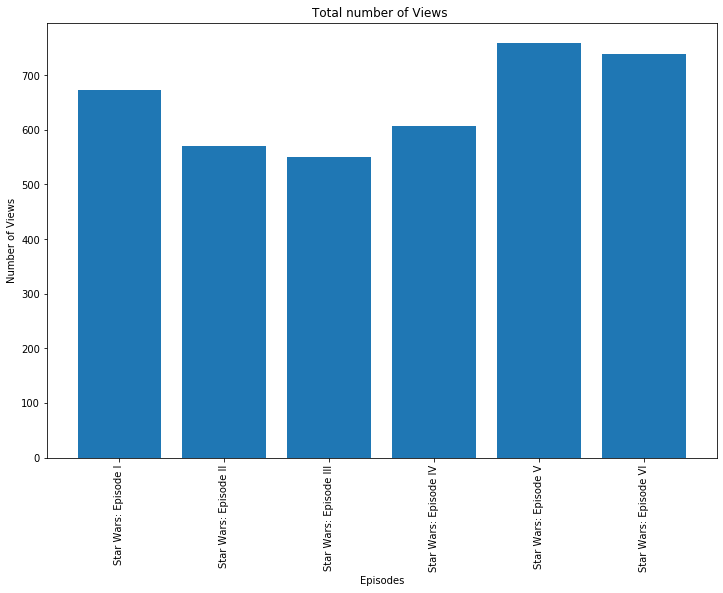

In [31]:
plt.figure(figsize=(12,8))
plt.bar(episodes,no_of_views)
plt.xticks(rotation = 90)
plt.title('Total number of Views ')
plt.ylabel('Number of Views')
plt.xlabel('Episodes')
plt.show()

In [66]:
star_wars['RANKING;Star Wars: Episode I The Phantom Menace'] = star_wars['RANKING;Star Wars: Episode I The Phantom Menace'].astype('float',errors='ignore')
star_wars['RANKING;Star Wars: Episode II Attack of the Clones'] = star_wars['RANKING;Star Wars: Episode II Attack of the Clones'].astype('float',errors='ignore')
star_wars['RANKING;Star Wars: Episode III Revenge of the Sith'] = star_wars['RANKING;Star Wars: Episode III Revenge of the Sith'].astype('float',errors='ignore')
star_wars['RANKING;Star Wars: Episode IV A New Hope'] = star_wars['RANKING;Star Wars: Episode IV A New Hope'].astype('float',errors='ignore')
star_wars['RANKING;Star Wars: Episode V The Empire Strikes Back'] = star_wars['RANKING;Star Wars: Episode V The Empire Strikes Back'].astype('float',errors='ignore')
star_wars['RANKING;Star Wars: Episode VI Return of the Jedi'] = star_wars['RANKING;Star Wars: Episode VI Return of the Jedi'].astype('float',errors='ignore')

In [67]:
e1_rating_mean = star_wars['RANKING;Star Wars: Episode I The Phantom Menace'].mean()
e2_rating_mean = star_wars['RANKING;Star Wars: Episode II Attack of the Clones'].mean()
e3_rating_mean = star_wars['RANKING;Star Wars: Episode III Revenge of the Sith'].mean()
e4_rating_mean = star_wars['RANKING;Star Wars: Episode IV A New Hope'].mean()
e5_rating_mean = star_wars['RANKING;Star Wars: Episode V The Empire Strikes Back'].mean()
e6_rating_mean = star_wars['RANKING;Star Wars: Episode VI Return of the Jedi'].mean()


In [68]:
rating_mean = [e1_rating_mean,e2_rating_mean,e3_rating_mean,e4_rating_mean,e5_rating_mean,e6_rating_mean]

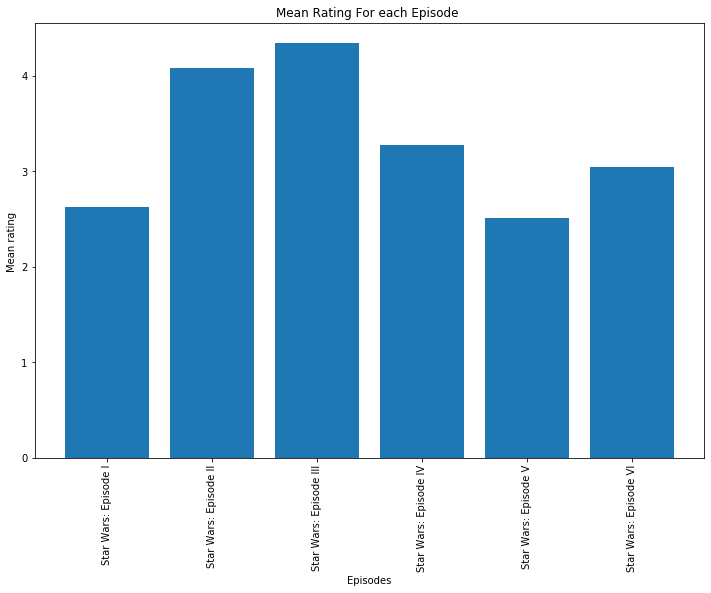

In [69]:
plt.figure(figsize=(12,8))
plt.bar(episodes,rating_mean)
plt.xticks(rotation = 90)
plt.title('Mean Rating For each Episode ')
plt.ylabel('Mean rating ')
plt.xlabel('Episodes')
plt.show()

In [71]:
male_star_war = star_wars[star_wars['Gender'] == 'Male']
female_star_war = star_wars[star_wars['Gender'] == 'Female']

In [81]:
male_star_war

,ID,Seen_one,Are you a fan?,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,RANKING;Star Wars: Episode I The Phantom Menace,RANKING;Star Wars: Episode II Attack of the Clones,RANKING;Star Wars: Episode III Revenge of the Sith,RANKING;Star Wars: Episode IV A New Hope,RANKING;Star Wars: Episode V The Empire Strikes Back,RANKING;Star Wars: Episode VI Return of the Jedi,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",FAV;Luke Skywalker,FAV;Princess Leia Organa,FAV;Anakin Skywalker,FAV;Obi Wan Kenobi,FAV;Emperor Palpatine,FAV;Darth Vader,FAV;Lando Calrissian,FAV;Boba Fett,FAV;C-3P0,FAV;R2 D2,FAV;Jar Jar Binks,FAV;Padme Amidala,FAV;Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1154,3.288429e+09,False,NaN,False,False,False,False,False,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Male,30-44,"$50,000 - $99,999",Bachelor degree,West South Central
1158,3.288423e+09,False,NaN,False,False,False,False,False,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Male,45-60,"$100,000 - $149,999",Graduate degree,Middle Atlantic
1165,3.288415e+09,True,False,True,True,True,False,True,True,5.0,4.0,3.0,6.0,1.0,2.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Somewhat favora

In [84]:
episode1_male_watches = male_star_war['Star Wars: Episode I The Phantom Menace'].sum()
episode2_male_watches = male_star_war['Star Wars: Episode II Attack of the Clones'].sum()
episode3_male_watches = male_star_war['Star Wars: Episode III Revenge of the Sith'].sum()
episode4_male_watches = male_star_war['Star Wars: Episode IV A New Hope'].sum()
episode5_male_watches = male_star_war['Star Wars: Episode V The Empire Strikes Back'].sum()
episode6_male_watches = male_star_war['Star Wars: Episode VI Return of the Jedi'].sum()


episode1_female_watches = female_star_war['Star Wars: Episode I The Phantom Menace'].sum()
episode2_female_watches = female_star_war['Star Wars: Episode II Attack of the Clones'].sum()
episode3_female_watches = female_star_war['Star Wars: Episode III Revenge of the Sith'].sum()
episode4_female_watches = female_star_war['Star Wars: Episode IV A New Hope'].sum()
episode5_female_watches = female_star_war['Star Wars: Episode V The Empire Strikes Back'].sum()
episode6_female_watches = female_star_war['Star Wars: Episode VI Return of the Jedi'].sum()

In [85]:
no_views_male = [episode1_male_watches,episode2_male_watches,episode3_male_watches,episode4_male_watches,episode5_male_watches,episode6_male_watches]

no_views_female = [episode1_female_watches,episode2_female_watches,episode3_female_watches,episode4_female_watches,episode5_female_watches,episode6_female_watches]

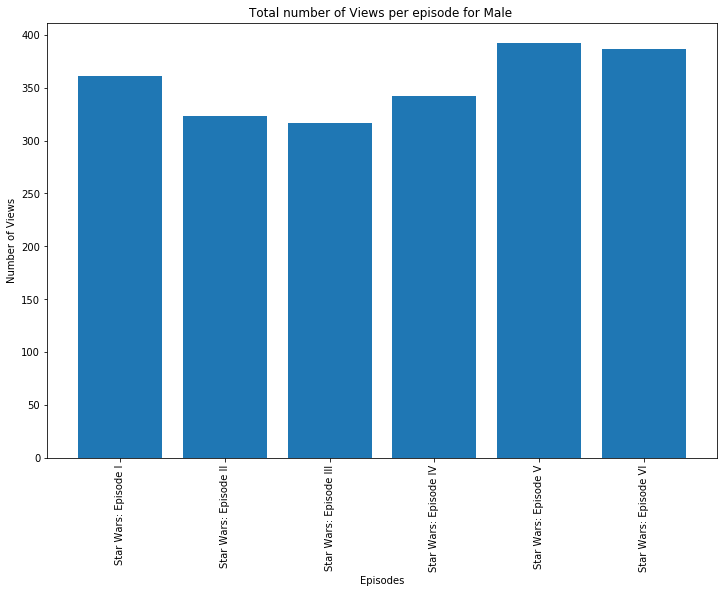

In [82]:
plt.figure(figsize=(12,8))
plt.bar(episodes,no_views_male)
plt.xticks(rotation = 90)
plt.title('Total number of Views per episode for Male ')
plt.ylabel('Number of Views')
plt.xlabel('Episodes')
plt.show()

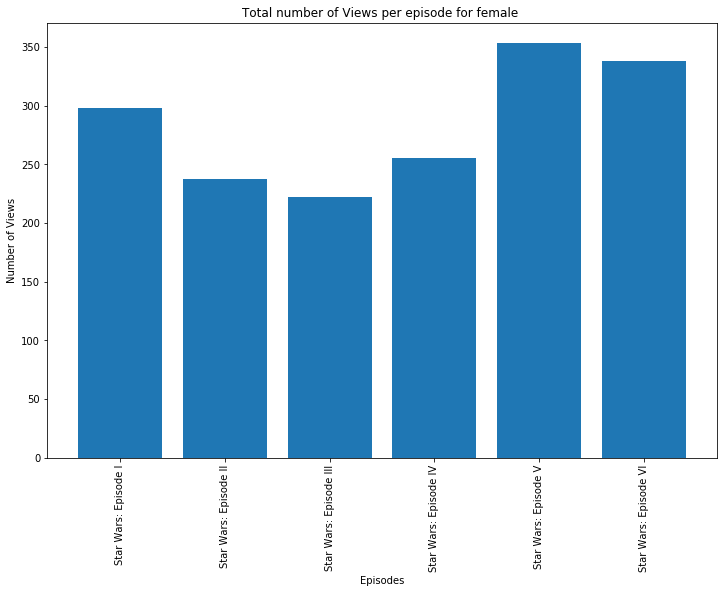

In [86]:
plt.figure(figsize=(12,8))
plt.bar(episodes,no_views_female)
plt.xticks(rotation = 90)
plt.title('Total number of Views per episode for female ')
plt.ylabel('Number of Views')
plt.xlabel('Episodes')
plt.show()

In [89]:
e1_rating_mean_female = female_star_war['RANKING;Star Wars: Episode I The Phantom Menace'].mean()
e2_rating_mean_female = female_star_war['RANKING;Star Wars: Episode II Attack of the Clones'].mean()
e3_rating_mean_female = female_star_war['RANKING;Star Wars: Episode III Revenge of the Sith'].mean()
e4_rating_mean_female = female_star_war['RANKING;Star Wars: Episode IV A New Hope'].mean()
e5_rating_mean_female = female_star_war['RANKING;Star Wars: Episode V The Empire Strikes Back'].mean()
e6_rating_mean_female = female_star_war['RANKING;Star Wars: Episode VI Return of the Jedi'].mean()


e1_rating_mean_male = male_star_war['RANKING;Star Wars: Episode I The Phantom Menace'].mean()
e2_rating_mean_male = male_star_war['RANKING;Star Wars: Episode II Attack of the Clones'].mean()
e3_rating_mean_male = male_star_war['RANKING;Star Wars: Episode III Revenge of the Sith'].mean()
e4_rating_mean_male = male_star_war['RANKING;Star Wars: Episode IV A New Hope'].mean()
e5_rating_mean_male = male_star_war['RANKING;Star Wars: Episode V The Empire Strikes Back'].mean()
e6_rating_mean_male = male_star_war['RANKING;Star Wars: Episode VI Return of the Jedi'].mean()

In [90]:
rating_mean_female = [e1_rating_mean_female,e2_rating_mean_female,e3_rating_mean_female,e4_rating_mean_female,e5_rating_mean_female,e6_rating_mean_female]

rating_mean_male = [e1_rating_mean_male,e2_rating_mean_male,e3_rating_mean_male,e4_rating_mean_male,e5_rating_mean_male,e6_rating_mean_male]


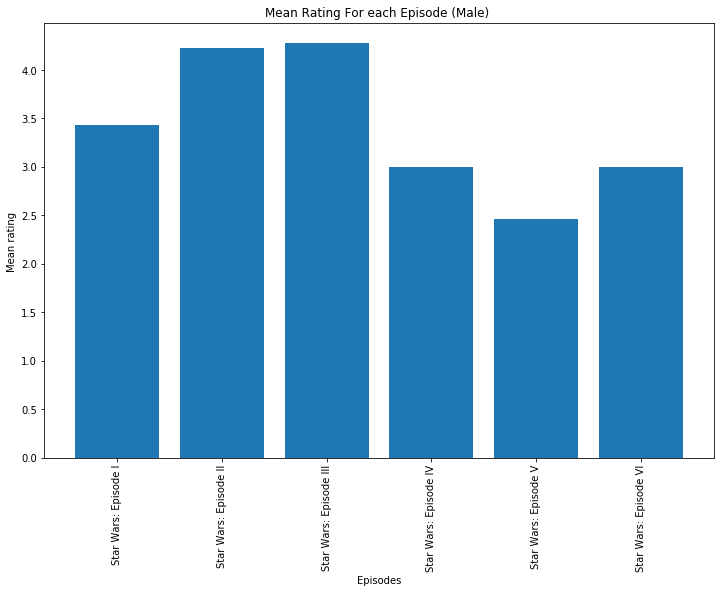

In [91]:
plt.figure(figsize=(12,8))
plt.bar(episodes,rating_mean_male)
plt.xticks(rotation = 90)
plt.title('Mean Rating For each Episode (Male) ')
plt.ylabel('Mean rating ')
plt.xlabel('Episodes')
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
plt.bar(episodes,rating_mean_female)
plt.xticks(rotation = 90)
plt.title('Mean Rating For each Episode ')
plt.ylabel('Mean rating ')
plt.xlabel('Episodes')
plt.show()